# ML - MLOPs

## Bank Customer Churn Prediction Using Machine Learning (MLOPs)

#### Objective

* The primary objective of this research project is to analyze and comprehend the determinants influencing customer churn within the banking sector, utilizing historical customer data pertaining to credit. By investigating a range of variables, including customer demographics, financial characteristics, and behavioral patterns, the study aims to develop a predictive model to identify the key factors driving customer attrition.
* This analysis is intended to provide actionable insights that can enhance customer retention strategies and improve overall customer satisfaction.

**Below find the detailed Implementation process step-by-step**

* Step 1: Data Reading in CSV format and Understanding
* Step 2: Data Cleaning
* Step 3: Data Visualization
* Step 4: Data Preparation
* Step 5: Segregating the Data into Train and Test Sets
* Step 6: Model Training & Evaluation Using MLOPs

In [1]:
# import all libraries and dependencies for dataframe & its manipulations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Configure all settings and setups for manipulation, analysis, and visualization of data.
pd.options.display.float_format='{:.2f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
sns.set(style='darkgrid')

### Data Reading in CSV format and Understanding

In [2]:
data = pd.read_csv(r"D:\MySQL\CustomerChurn_data.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### Data Dictionary
- **RowNumber:** Sequential number assigned to each row.
- **CustomerId:** Unique identifier for each customer.
- **Surname:** Customer's surname or last name.
- **CreditScore:** Numeric value representing the customer's credit score.
- **Geography:** Categorical variable indicating the customer's geographic location.
- **Gender:** Categorical variable representing the customer's gender.
- **Age:** Numeric value indicating the customer's age.
- **Tenure:** Number of years the customer has been associated with the bank.
- **Balance:** Numeric value representing the customer's account balance.
- **NumOfProducts:** Number of bank products/services used by the customer.
- **HasCrCard:** Binary variable indicating if the customer has a credit card (1 for yes, 0 for no).
- **IsActiveMember:** Binary variable indicating if the customer is an active bank member (1 for yes, 0 for no).
- **EstimatedSalary:** Estimated salary of the customer.
- **Exited:** Binary variable indicating if the customer churned (left the bank) (1 for yes, 0 for no).
- **Complain:** Binary variable indicating if the customer has lodged a complaint (1 for yes, 0 for no).
- **Satisfaction Score:** Customer satisfaction score (if available).
- **Card Type:** Type of credit card (if applicable).
- **Point Earned:** Points earned by the customer through bank transactions or programs.

In [3]:
print("Dataset info - columns, records/datapoints, data types, shape, statistical information")
print('*'*100)
data.info()
data.shape
data.columns

Dataset info - columns, records/datapoints, data types, shape, statistical information
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSala

(10000, 18)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [4]:
# description of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


<h4 style="color:yellow;">Observation:</h4>

<ul>
  <li>Just by having a glance at the data exploration done so far, it is clear that data is present in various data types like <code style="color:darkorange;">int64</code>, <code style="color:darkorange;">float64</code>, and <code style="color:darkorange;">object</code>.</li>
  <li>There are <span style="color:green;">no null values</span> in the dataset.</li>
  <li>Having a closer look at the mean and median of the numerical variables and their difference in value, features <code style="color:darkorange;">Balance</code> and <code style="color:darkorange;">EstimatedSalary</code> may result in the presence of <span style="color:red;">outliers</span>.</li>
</ul>


### Data cleaning

In [5]:
# Removing the columns not useful for dataset
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [6]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
# Checking missing values
data.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
# Segregation of Numerical and Categorical Variables/Columns
cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns
data_cat = data[cat_col]
data_num = data[num_col]

print("*"*20,"data containing only categorical columns","*"*20)
data_cat.head()
print("*"*20,"data containing only numerical columns","*"*20)
data_num.head()

******************** data containing only categorical columns ********************


,Geography,Gender,Card Type
0,France,Female,DIAMOND
1,Spain,Female,DIAMOND
2,France,Female,DIAMOND
3,France,Female,GOLD
4,Spain,Female,GOLD


******************** data containing only numerical columns ********************


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


<div style="background-color:brown; padding:10px;">
    
  <h4 style="colorblackw;">Observation:</h4>
  <ul>
    <li>When training a machine learning model, there will be an issue of the curse of dimensionality (where the dimensions of the dataset will be high in number, causing the ML model to drift around, become overfit and unstable, leading to incorrect predictions). This is why it is important to drop the unnecessary columns in the dataset during the cleaning stage itself. The features to be removed are <code style="color:darkorange;">RowNumber</code>, <code style="color:darkorange;">CustomerId</code>, and <code style="color:darkorange;">Surname</code>.</li>
    <li>Data segregation has been performed, separating the <code style="color:darkorange;">categorical</code> and <code style="color:darkorange;">numerical</code> variables for future processing.</li>
    <li>As expected, there are no missing values in the dataset.</li>
  </ul>
</div>


### Data Visualization
* Here we will identify if some predictors directly have a strong association with the outcome variable exited.

In [9]:
# Percentage of customer churn or stayed in the bank
total_customers = len(data)
churned_count = data[data['Exited'] == 1]['Exited'].count()
not_churned_count = data[data['Exited'] == 0]['Exited'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100

print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Percentage of customers who churned: 20.38%
Percentage of customers who did not churn: 79.62%


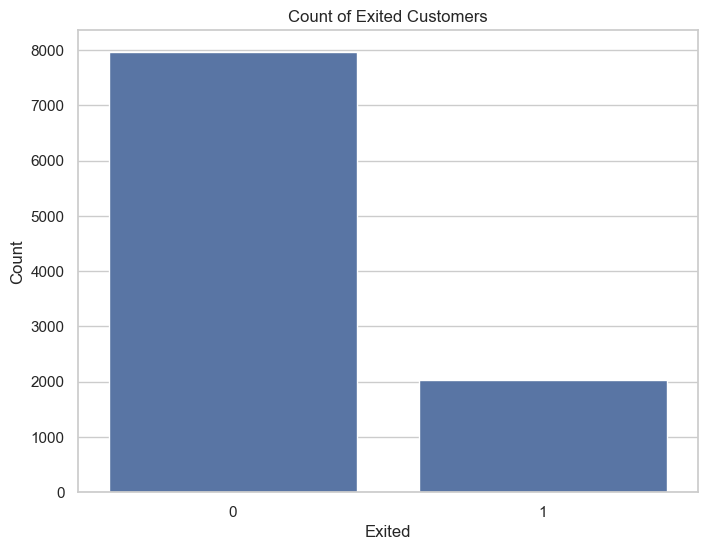

In [10]:
sns.set(style="whitegrid")

# Plotting a bar plot for the 'Exited' column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Exited')
plt.title('Count of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show();

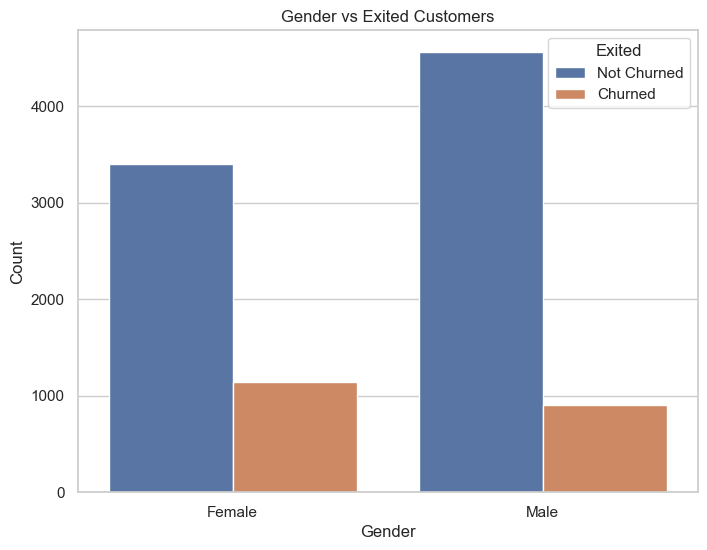

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='Exited')
plt.title('Gender vs Exited Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show();

In [12]:
data['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

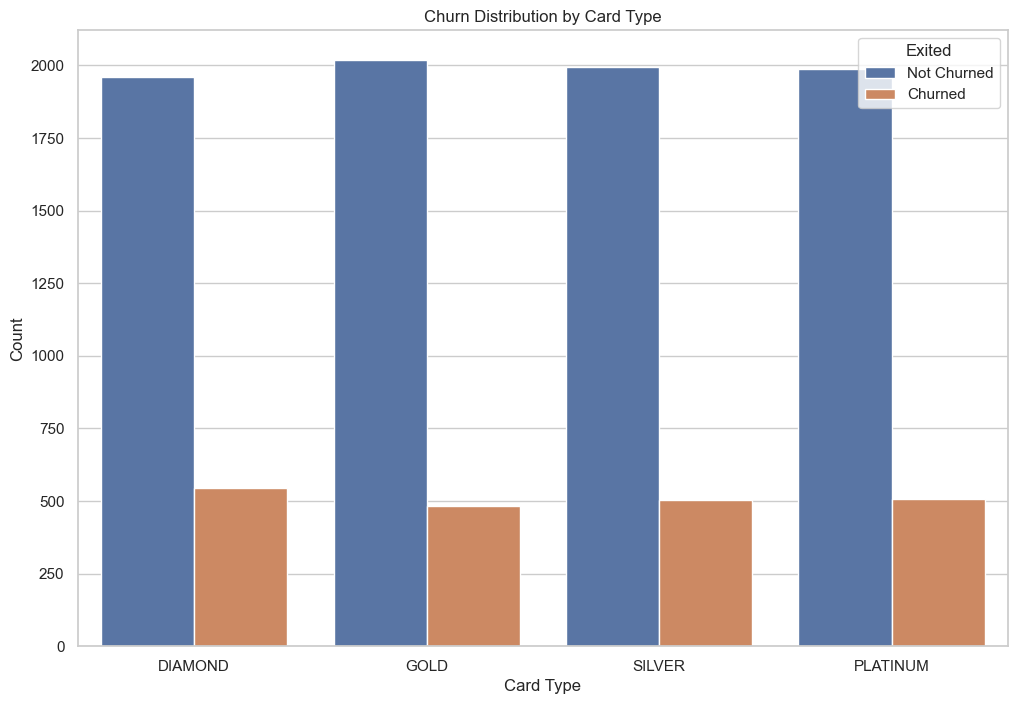

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Card Type', hue='Exited', order=['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'])
plt.title('Churn Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show();

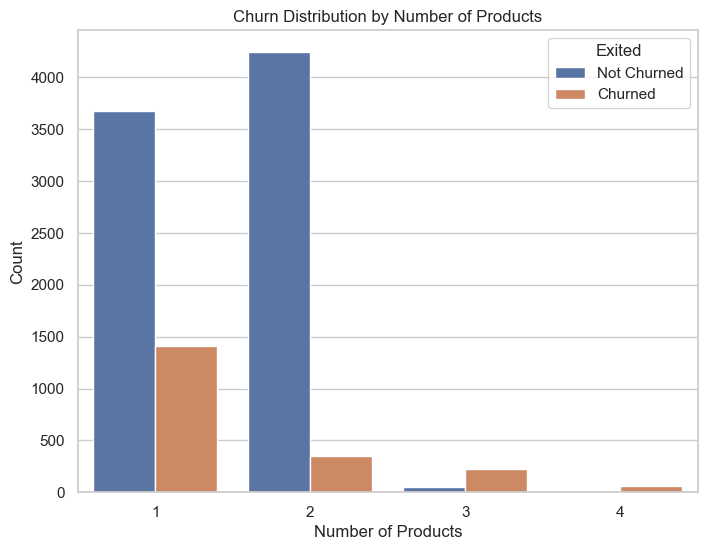

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='NumOfProducts', hue='Exited')
plt.title('Churn Distribution by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show();

In [15]:
# Calculate churn percentages by number of products
churn_percentage_by_product_count = data.groupby('NumOfProducts')['Exited'].mean() * 100

# Display churn percentage by number of products
print("Churn Percentage by Number of Products:")
print(churn_percentage_by_product_count)

Churn Percentage by Number of Products:
NumOfProducts
1    27.71
2     7.60
3    82.71
4   100.00
Name: Exited, dtype: float64


#### Observation
* Customers with a higher number of products (3 or 4) exhibit a higher probability of churn. Conversely, customers with only 2 products have a lower chance of leaving the bank compared to those with just 1 product.

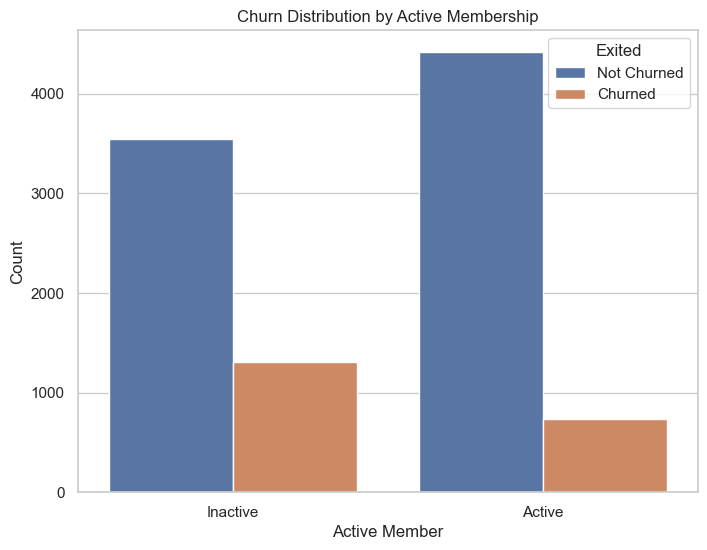

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='IsActiveMember', hue='Exited')
plt.title('Churn Distribution by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show();

#### Observation 
* Active customers of the bank tend to have a higher likelihood of staying (not churning) compared to inactive customers.

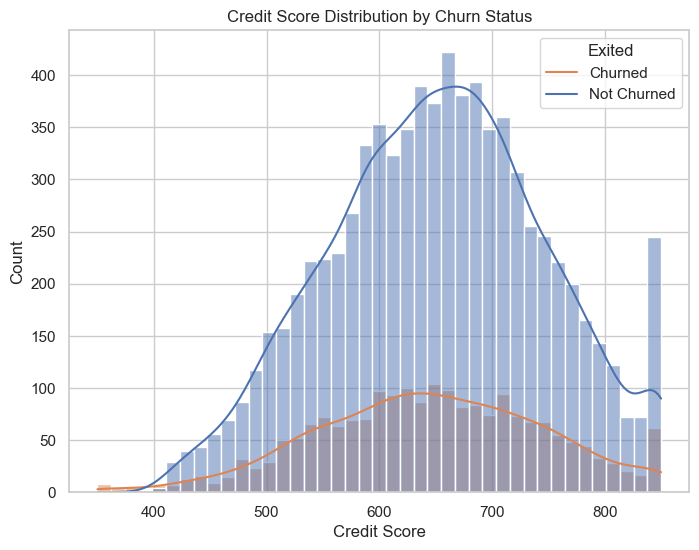

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data, x='CreditScore', hue='Exited', kde=True, )
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Churned', 'Not Churned'])
plt.show();

#### Observation
* Customers with lower credit scores (400-600 range) show a higher tendency to churn, indicating a likelihood for churn among this group.
* 
Conversely, customers with higher credit scores 6000-800 range) exhibit a greater tendency to stay with the service, suggesting higher retention rates among this cohort.

### Data Preparation

In [18]:
# First encode the categorical variables of the dataset with dummies-
# (One hot encoding as there is no ordinal data) and store in new variable `dummies`.
cat_col
dummies = pd.get_dummies(data[cat_col], drop_first = True)
dummies.head()

# Add the results to the original dataframe
data = pd.concat([data, dummies], axis = 1)

# Drop the original cat variables as dummies are already created
data.drop(cat_col, axis = 1, inplace = True)
data.shape

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,False,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,True,False,False
4,False,True,False,True,False,False


(10000, 18)

In [19]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False


#### Rescaling the Features
* In Simple Linear Regression, scaling does not impact the model's performance. However, it is crucial to rescale variables in other models to ensure they are on a comparable scale. Without comparable scales, some coefficients obtained from fitting the regression model might be disproportionately large or small compared to others.

The two common methods for rescaling are:

* `Min-Max Scaling`
* `Standardization (mean = 0, standard deviation = 1)`
* 
In this case, we will use Standardization Scaling.

In [20]:
from sklearn.preprocessing import StandardScaler

num_columns_list = num_col.tolist()
num_columns_list.remove("Exited")
num_col = pd.Index(num_columns_list)
numerical_columns = num_col

scaler = StandardScaler()
scaler.fit(data[numerical_columns])
data[numerical_columns] = scaler.transform(data[numerical_columns])

StandardScaler()

In [21]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.33,0.29,-1.04,-1.23,-0.91,0.65,0.97,0.02,1,1.97,-0.72,-0.63,False,False,False,False,False,False
1,-0.44,0.20,-1.39,0.12,-0.91,-1.55,0.97,0.22,0,1.97,-0.01,-0.67,False,True,False,False,False,False
2,-1.54,0.29,1.03,1.33,2.53,0.65,-1.03,0.24,1,1.97,-0.01,-1.02,False,False,False,False,False,False
3,0.50,0.01,-1.39,-1.23,0.81,-1.55,-1.03,-0.11,0,-0.51,1.41,-1.14,False,False,False,True,False,False
4,2.06,0.39,-1.04,0.79,-0.91,0.65,0.97,-0.37,0,-0.51,1.41,-0.80,False,True,False,True,False,False


In [22]:
data.dtypes

CreditScore           float64
Age                   float64
Tenure                float64
Balance               float64
NumOfProducts         float64
HasCrCard             float64
IsActiveMember        float64
EstimatedSalary       float64
Exited                  int64
Complain              float64
Satisfaction Score    float64
Point Earned          float64
Geography_Germany        bool
Geography_Spain          bool
Gender_Male              bool
Card Type_GOLD           bool
Card Type_PLATINUM       bool
Card Type_SILVER         bool
dtype: object

In [23]:
data["Exited"].unique()

array([1, 0], dtype=int64)

### Segregating the Data into Train and Test Sets

In [24]:
! pip install scikit-learn

In [25]:
from sklearn.model_selection import train_test_split
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']  # Target variable

# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

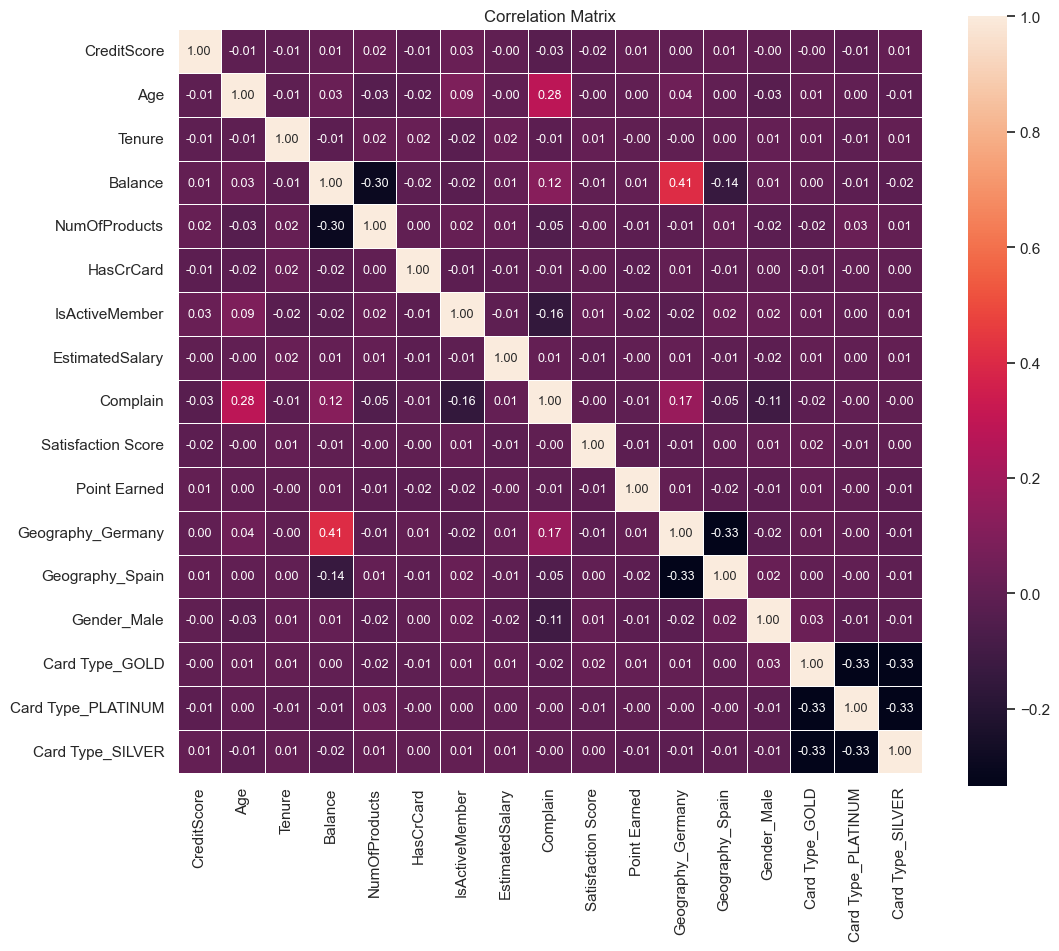

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"size": 9}, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show();

### Model Training & Evaluation Using MLOPs
* Now will fit/train various classification machine learning models and evaluate them along with MLOPs for model deployment, tracking and monitoring.

### MLOP's --- Model Experiment Tracking
* MLOps, short for Machine Learning Operations, refers to the practices and tools used to streamline and operationalize machine learning models in production environments.
* 
It combines elements of machine learning, software engineering, and operations to ensure the reliable and efficient deployment, monitoring, and management of machine learning systems or models

>> 
The primary goal of MLOps is to bridge the gap between the development and deployment of machine learning models, enabling organizations to scale their ML initiatives and derive value from their models in real-world scenarios.

#### Experiment Tracking - 1 : Logistic Regression

In [27]:
! pip install mlflow

In [28]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Enabling MLflow autologging
mlflow.autolog()

# Starting an MLflow run
with mlflow.start_run():
    # Initializing and training the Logistic Regression model
    model_lr = LogisticRegression()
    model_lr.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = model_lr.predict(X_test)

    # Calculating and logging the accuracy
    logistic_regression_accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", logistic_regression_accuracy)

    # Printing the accuracy
    print("Accuracy of the Logistic Regression model:", logistic_regression_accuracy)

# To view the logged data, start the MLflow UI by running the following command in the terminal:
# mlflow ui

# Then open your browser and go to http://localhost:5000/ to view the run details.

2025/01/09 13:44:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/09 13:44:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


LogisticRegression()

Accuracy of the Logistic Regression model: 0.999
